In [22]:
# 1. 라이브러리 불러오기

# pandas / numpy → 데이터 다루기
# matplotlib / seaborn → 데이터 시각화
# sklearn → 데이터 분할(train/test), 전처리(Label 인코딩, 스케일링)
# tensorflow.keras → 딥러닝 모델 만들기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn import datasets

In [4]:
# 1. 데이터 로드
digits = datasets.load_digits()
X = digits.images.reshape(len(digits.images), -1)  # (1797, 64)
y = digits.target  # 0~9 정수 레이블

In [5]:
# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# 3. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# 4. 라벨 원-핫 인코딩
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [8]:
# 5. 딥러닝 모델 구성
model = Sequential()
model.add(Dense(128, input_shape=(64,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 클래스 10개 (0~9)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 6. 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 7. 학습
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2078 - loss: 2.3182 - val_accuracy: 0.8021 - val_loss: 1.2513
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6718 - loss: 1.2167 - val_accuracy: 0.8611 - val_loss: 0.6083
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8338 - loss: 0.6716 - val_accuracy: 0.9028 - val_loss: 0.3997
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8698 - loss: 0.4511 - val_accuracy: 0.9201 - val_loss: 0.3112
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9047 - loss: 0.3419 - val_accuracy: 0.9236 - val_loss: 0.2737
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9104 - loss: 0.3054 - val_accuracy: 0.9306 - val_loss: 0.2577
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9429 - loss: 0.2371 - val_accuracy: 0.9340 - val_loss: 0.2317
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9338 - loss: 0.2021 - val_accuracy: 0.9444 - val_loss

In [11]:
# 8. 평가
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9778


In [12]:
# 9. 학습 곡선 시각화
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

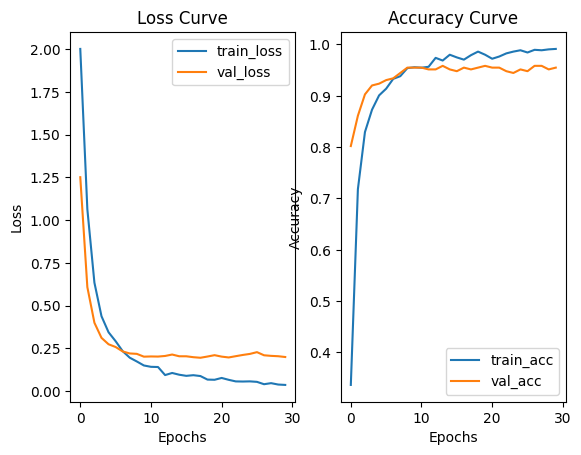

In [19]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


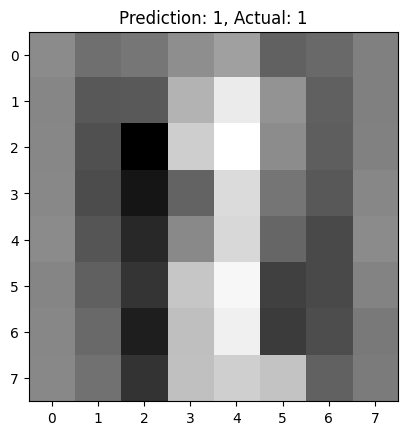

In [21]:
# 10. 샘플 예측
sample_idx = 10
sample = X_test[sample_idx].reshape(1, -1)
pred = np.argmax(model.predict(sample), axis=1)

plt.imshow(X_test[sample_idx].reshape(8,8), cmap='gray')
plt.title(f"Prediction: {pred[0]}, Actual: {y_test[sample_idx]}")
plt.show()